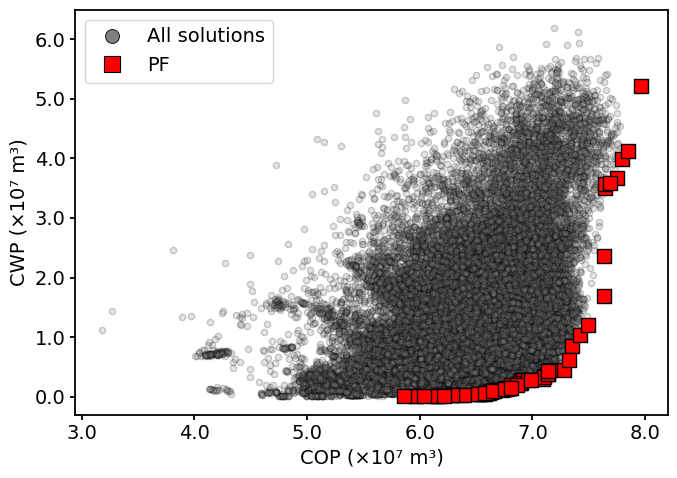

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

# ---------------------------------------------------
# Style FIRST (this resets rcParams)
# ---------------------------------------------------
plt.style.use("default")

# ---------------------------------------------------
# Global font and style configuration (AFTER style)
# ---------------------------------------------------
font_size = 14
mpl.rcParams.update({
    "font.size": font_size,
    "axes.labelsize": font_size,
    "axes.titlesize": font_size,
    "xtick.labelsize": font_size,
    "ytick.labelsize": font_size,
    "legend.fontsize": font_size,
    "axes.linewidth": 1.3,
})

# ---------------------------------------------------
# Load dataset
# ---------------------------------------------------
df = pd.read_csv("datasets/MOU1D.csv", delimiter=";", engine="python")
objs = df.values[:, -2:]

# ---------------------------------------------------
# Objective directions
# True  -> minimize
# False -> maximize
# ---------------------------------------------------
minimize = np.array([False, True])

# ---------------------------------------------------
# Dominance check
# ---------------------------------------------------
def dominates(q, p, minimize):
    better_or_equal = True
    strictly_better = False

    for k in range(len(p)):
        if minimize[k]:
            if q[k] > p[k]:
                return False
            if q[k] < p[k]:
                strictly_better = True
        else:
            if q[k] < p[k]:
                return False
            if q[k] > p[k]:
                strictly_better = True

    return strictly_better

# ---------------------------------------------------
# Update Pareto front
# ---------------------------------------------------
def update_pareto_front(current_pf, batch, minimize):
    for b in batch:
        dominated = False
        to_remove = []

        for i, p in enumerate(current_pf):
            if dominates(p, b, minimize):
                dominated = True
                break
            if dominates(b, p, minimize):
                to_remove.append(i)

        if not dominated:
            for idx in reversed(to_remove):
                current_pf.pop(idx)
            current_pf.append(b)

    return current_pf

# ---------------------------------------------------
# Compute Pareto front
# ---------------------------------------------------
batch_size = 2000
pareto_frontier = []

for start in range(0, len(objs), batch_size):
    batch = objs[start:start + batch_size]
    pareto_frontier = update_pareto_front(pareto_frontier, batch, minimize)

pf = np.array(pareto_frontier)

# ---------------------------------------------------
# Plot
# ---------------------------------------------------
plt.figure(figsize=(7, 5))

plt.scatter(
    objs[:, 0], objs[:, 1],
    color="grey",
    alpha=0.2,
    s=20,
    rasterized=True,
    edgecolors="black"
)

plt.scatter(
    pf[:, 0], pf[:, 1],
    color="red",
    s=100,
    marker="s",
    edgecolors="black"
)

plt.xlabel("COP (×10⁷ m³)")
plt.ylabel("CWP (×10⁷ m³)")

ax = plt.gca()

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e7:.1f}"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y/1e7:.1f}"))

ax.tick_params(colors="black", width=1.3)

legend_elements = [
    Line2D(
        [0], [0],
        marker="o",
        linestyle="",
        markerfacecolor="grey",
        markeredgecolor="black",
        markeredgewidth=0.6,
        markersize=10,
        label="All solutions"
    ),
    Line2D(
        [0], [0],
        marker="s",
        linestyle="",
        markerfacecolor="red",
        markeredgecolor="black",
        markeredgewidth=0.8,
        markersize=11,
        label="PF"
    )
]

ax.legend(handles=legend_elements, loc="upper left", frameon=True)

plt.tight_layout()
plt.savefig("figures/MOU1D.pdf")
# plt.show()


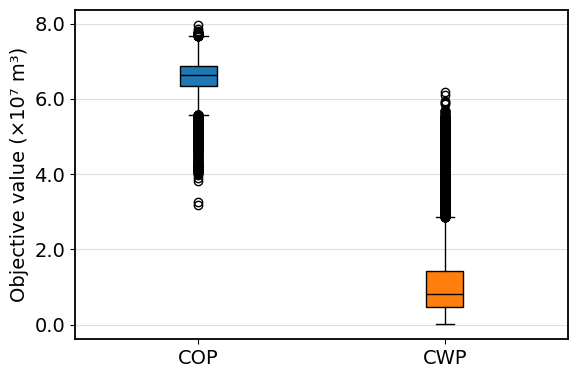

In [18]:
import matplotlib.pyplot as plt

obj_cols = ["COP", "CWP"]

plt.figure(figsize=(6, 4))
box = plt.boxplot(
    objs,
    tick_labels=obj_cols,
    showfliers=True,
    patch_artist=True
)

colors = ["tab:blue", "tab:orange"]

for element in ["boxes", "whiskers", "caps", "medians"]:
    plt.setp(box[element], color="black")

for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

plt.ylabel("Objective value (×10⁷ m³)")
plt.grid(True, axis="y", alpha=0.4)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y/1e7:.1f}"))
plt.tight_layout()
plt.savefig("figures/boxplot_MOU1D.pdf")
plt.show()

## Preprocessing

In [19]:
df1 = df.copy(deep=True)
df1.head(3)

,NA2_CONSIDER,NA3D_CONSIDER,NA1A_CONSIDER,PltPRDSTL_PltPRDSTO,PltPRDSTW,PltINJSTW,PROD005_DIRECTION,PROD005_I,PROD005_J,PROD005_K,...,INJ022_DIRECTION,INJ022_I,INJ022_J,INJ022_K,INJ023_DIRECTION,INJ023_I,INJ023_J,INJ023_K,COP,CWP
0,1,1,0,17825,9765.0,29955,I,27,20,1,...,J,71,24,15,I,39,15,15,72032300,25111700
1,0,1,1,20150,9765.0,32550,I,29,18,3,...,I,71,22,6,J,45,9,7,65086900,27430400
2,0,0,1,16275,9067.5,31465,I,27,20,1,...,J,69,22,8,I,39,13,15,68373700,40036600


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87022 entries, 0 to 87021
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NA2_CONSIDER         87022 non-null  int64  
 1   NA3D_CONSIDER        87022 non-null  int64  
 2   NA1A_CONSIDER        87022 non-null  int64  
 3   PltPRDSTL_PltPRDSTO  87022 non-null  int64  
 4   PltPRDSTW            87022 non-null  float64
 5   PltINJSTW            87022 non-null  int64  
 6   PROD005_DIRECTION    87022 non-null  object 
 7   PROD005_I            87022 non-null  int64  
 8   PROD005_J            87022 non-null  int64  
 9   PROD005_K            87022 non-null  int64  
 10  PROD006_I            87022 non-null  int64  
 11  PROD006_J            87022 non-null  int64  
 12  PROD007_I            87022 non-null  int64  
 13  PROD007_J            87022 non-null  int64  
 14  PROD009_DIRECTION    87022 non-null  object 
 15  PROD009_I            87022 non-null 

In [20]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


class DirectionEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, suffix="_DIRECTION"):
        self.suffix = suffix

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        direction_cols = [col for col in X.columns if col.endswith(self.suffix)]
        for col in direction_cols:
            X[col] = X[col].map({'I': 0, 'J': 1})
        return X
    

preprocessor = Pipeline(steps=[
    ("direction_encoder", DirectionEncoder()),
    ("scaler", StandardScaler())
])

## Regression

In [28]:
#########################
# MODELS
#########################

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


algorithms = {

    # "MLP": (
    # MultiOutputRegressor(
    #     MLPRegressor(
    #         max_iter=2000,
    #         random_state=42
    #     )
    # ),
    # {
    #     "model__estimator__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    #     "model__estimator__activation": ["relu", "tanh"],
    #     "model__estimator__alpha": [1e-4, 1e-3, 1e-2]
    # }
    # ),

    # "SVM": (
    #     MultiOutputRegressor(SVR()),
    #     {
    #         "model__estimator__C": [0.1, 1, 10, 50],
    #         "model__estimator__kernel": ["linear"]
    #     }
    # ),

    "XGBoost": (
    MultiOutputRegressor(
        XGBRegressor(
            objective="reg:squarederror",
            #tree_method="gpu_hist",      # usa GPU
            #predictor="gpu_predictor",   # predição na GPU
            #gpu_id=0,                    # primeira GPU disponível
            random_state=42,
            n_jobs=1
        )
    ),
    {
        "model__estimator__n_estimators": [200, 400],
        "model__estimator__max_depth": [3, 5, 7],
        "model__estimator__learning_rate": [0.01, 0.05, 0.1],
        "model__estimator__subsample": [0.8, 1.0],
        "model__estimator__colsample_bytree": [0.8, 1.0]
    }
    ),

    "RF": (
        RandomForestRegressor(random_state=0),
        {
            "model__n_estimators": [100, 200],
            "model__max_depth": [5, 10, None]
        }
    ),

    "GB": (
        MultiOutputRegressor(GradientBoostingRegressor(random_state=0)),
        {
            "model__estimator__n_estimators": [100, 200],
            "model__estimator__learning_rate": [0.05, 0.1]
        }
    ),

    "Ridge": (
        MultiOutputRegressor(Ridge()),
        {"model__estimator__alpha": [0.1, 1, 10]}
    ),

    "Lasso": (
        MultiOutputRegressor(Lasso(max_iter=5000)),
        {"model__estimator__alpha": [0.01, 0.1, 1]}
    ),

    "ElasticNet": (
        MultiOutputRegressor(ElasticNet(max_iter=5000)),
        {
            "model__estimator__alpha": [0.01, 0.1, 1],
            "model__estimator__l1_ratio": [0.1, 0.5, 0.9]
        }
    ),

    "KNN": (
        MultiOutputRegressor(KNeighborsRegressor()),
        {"model__estimator__n_neighbors": [3, 5, 7]}
    ),

    "LightGBM": (
        MultiOutputRegressor(
            LGBMRegressor(
                objective="regression",
                random_state=42,
                n_jobs=1,
                verbosity=0 # apenas warnings críticos
            )
        ),
        {
            "model__estimator__n_estimators": [200, 400],
            "model__estimator__learning_rate": [0.01, 0.05, 0.1],
            "model__estimator__max_depth": [-1, 5, 10],
            "model__estimator__num_leaves": [31, 63, 127],
            "model__estimator__subsample": [0.8, 1.0],
            "model__estimator__colsample_bytree": [0.8, 1.0]
        }
    ),

    "CatBoost": (
    MultiOutputRegressor(
        CatBoostRegressor(
            loss_function="RMSE",
            random_seed=42,
            verbose=False,      # <-- SILENCIA LOGS
            thread_count=1      # <-- controle de paralelismo (fair comparison)
        )
    ),
    {
        "model__estimator__iterations": [300, 500],
        "model__estimator__learning_rate": [0.01, 0.05, 0.1],
        "model__estimator__depth": [6, 8, 10],
        "model__estimator__l2_leaf_reg": [1, 3, 5]
    }
),

}


In [29]:
##########################
# DATA
#########################

# dado
X = df1.drop(columns=["COP", "CWP"])
y = df1[["COP", "CWP"]]

In [30]:
###########################
# PIPELINE
###########################

import time
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def run_multioutput_regression_cv(
    algorithms,
    X,
    y,
    preprocessor,
    n_splits=5
):
    scores = {}
    best_params = {}
    times = {}

    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for name, (model, param_grid) in algorithms.items():

        start_alg = time.time()

        fold_scores = []

        pipe = Pipeline(steps=[
            ("preprocess", preprocessor),
            ("model", model)
        ])

        grid = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=param_grid,
            scoring="neg_mean_squared_error",
            cv=cv,
            n_jobs=-1
        )

        start_search = time.time()
        grid.fit(X, y)
        end_search = time.time()
        search_time = end_search - start_search
        best_params[name] = grid.best_params_

        start_cv = time.time()
        # Avaliação por fold
        for train_idx, test_idx in cv.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            grid.best_estimator_.fit(X_train, y_train)
            y_pred = grid.best_estimator_.predict(X_test)

            fold_scores.append({
                "mse": mean_squared_error(y_test, y_pred, multioutput="uniform_average"),
                "mae": mean_absolute_error(y_test, y_pred, multioutput="uniform_average"),
                "r2": r2_score(y_test, y_pred, multioutput="uniform_average")
            })
        end_cv = time.time()
        cv_time = end_cv - start_cv

        scores[name] = fold_scores

        # ---- SALVA RESULTADOS PARCIAIS ----
        mean_results = pd.DataFrame({
            alg: [
                np.mean([s['mse'] for s in scores[alg]]),
                np.mean([s['mae'] for s in scores[alg]]),
                np.mean([s['r2'] for s in scores[alg]])
            ]
            for alg in scores
        }, index=['MSE', 'MAE', 'R²'])

        std_results = pd.DataFrame({
            alg: [
                np.std([s['mse'] for s in scores[alg]]),
                np.std([s['mae'] for s in scores[alg]]),
                np.std([s['r2'] for s in scores[alg]])
            ]
            for alg in scores
        }, index=['MSE', 'MAE', 'R²'])

        mean_results.to_csv("regression_results_mean.csv")
        std_results.to_csv("regression_results_std.csv")
        pd.DataFrame(best_params).T.to_csv("regression_best_params.csv")

        end_alg = time.time()
        total_time = end_alg - start_alg

        times[name] = {
            "search_time_min": search_time / 60,
            "cv_time_min": cv_time / 60,
            "total_time_min": total_time / 60
        }

    return scores, best_params, times

In [31]:
ini = time.time()
# Rodando a validação cross-validation
scores, best_params, times = run_multioutput_regression_cv(
    algorithms=algorithms,
    X=X,          
    y=y,         
    preprocessor=preprocessor,
    n_splits=5 
)

fim = time.time()
print('\nTempo TOTAL de execução:', round((fim - ini) / 60, 2), 'minutos')

times_df = pd.DataFrame(times).T.round(2)
times_df.to_csv("regression_times.csv")

print("\nTempo de execução por algoritmo (minutos)")
display(times_df)

mean_results = pd.DataFrame({
    alg: [
        np.mean([s['mse'] for s in scores[alg]]),
        np.mean([s['mae'] for s in scores[alg]]),
        np.mean([s['r2'] for s in scores[alg]])
    ]
    for alg in scores
}, index=['MSE', 'MAE', 'R²'])


std_results = pd.DataFrame({
    alg: [
        np.std([s['mse'] for s in scores[alg]]),
        np.std([s['mae'] for s in scores[alg]]),
        np.std([s['r2'] for s in scores[alg]])
    ]
    for alg in scores
}, index=['MSE', 'MAE', 'R²'])


mean_results.to_csv("regression_results_mean.csv")
std_results.to_csv("regression_results_std.csv")

pd.DataFrame(best_params).T.to_csv("regression_best_params.csv")

print("Média das métricas (↓ MSE/MAE melhor, ↑ R² melhor)")
display(mean_results.round(4))

print("Desvio padrão das métricas")
display(std_results.round(4))

C:\Users\flopes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\flopes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\flopes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn


Tempo TOTAL de execução: 29.82 minutos

Tempo de execução por algoritmo (minutos)


,search_time_min,cv_time_min,total_time_min
XGBoost,0.59,0.59,1.18
RF,4.60,7.58,12.17
GB,2.21,3.67,5.88
Ridge,0.04,0.02,0.06
Lasso,0.36,0.88,1.24
ElasticNet,0.65,1.11,1.76
KNN,0.32,0.16,0.47
LightGBM,0.66,0.46,1.12
CatBoost,3.76,2.17,5.94


Média das métricas (↓ MSE/MAE melhor, ↑ R² melhor)


,XGBoost,RF,GB,Ridge,Lasso,ElasticNet,KNN,LightGBM,CatBoost
MSE,1.911397e+12,2.953474e+12,6.071143e+12,1.522300e+13,1.522303e+13,1.522294e+13,6.107186e+12,1.661633e+12,1.496155e+12
MAE,8.208492e+05,7.955962e+05,1.712898e+06,2.844340e+06,2.844374e+06,2.844140e+06,1.332539e+06,7.348716e+05,7.167945e+05
R²,9.543000e-01,9.300000e-01,8.389000e-01,6.041000e-01,6.041000e-01,6.041000e-01,8.477000e-01,9.613000e-01,9.645000e-01


Desvio padrão das métricas


,XGBoost,RF,GB,Ridge,Lasso,ElasticNet,KNN,LightGBM,CatBoost
MSE,6.066542e+10,1.500950e+11,1.124661e+11,2.121783e+11,2.121160e+11,2.125456e+11,1.901234e+11,6.765030e+10,5.321293e+10
MAE,7.736847e+03,1.340975e+04,1.617406e+04,1.922311e+04,1.921439e+04,1.927335e+04,1.827192e+04,7.164067e+03,6.724994e+03
R²,9.000000e-04,3.300000e-03,2.000000e-03,1.400000e-03,1.400000e-03,1.400000e-03,3.400000e-03,1.200000e-03,9.000000e-04


In [45]:
# Subamostra X
X_debug = X.sample(n=200, random_state=42)

# Alinha y com os mesmos índices
y_debug = y.loc[X_debug.index]

# algorithms_debug = {
#     "Ridge": (
#         MultiOutputRegressor(Ridge()),
#         {"model__estimator__alpha": [1.0]}
#     ),
#     "RF": (
#         RandomForestRegressor(random_state=0),
#         {"model__n_estimators": [50], "model__max_depth": [5]}
#     )
# }

ini = time.time()

# Chamada correta da função
scores, best_params = run_multioutput_regression_cv(
    algorithms=algorithms,
    X=X_debug,
    y=y_debug,
    preprocessor=preprocessor,
    n_splits=2
)

fim = time.time()
print('\nTempo de execução:', round((fim - ini)/60, 2), 'minutos')


mean_results = pd.DataFrame({
    alg: [
        np.mean([s['mse'] for s in scores[alg]]),
        np.mean([s['mae'] for s in scores[alg]]),
        np.mean([s['r2'] for s in scores[alg]])
    ]
    for alg in scores
}, index=['MSE','MAE','R²'])

std_results = pd.DataFrame({
    alg: [
        np.std([s['mse'] for s in scores[alg]]),
        np.std([s['mae'] for s in scores[alg]]),
        np.std([s['r2'] for s in scores[alg]])
    ]
    for alg in scores
}, index=['MSE','MAE','R²'])

print("Média das métricas (↓ MSE/MAE melhor, ↑ R² melhor)")
display(mean_results.round(4))

print("Desvio padrão das métricas")
display(std_results.round(4))


C:\Users\flopes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\flopes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\flopes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn


Tempo de execução: 0.05 minutos
Média das métricas (↓ MSE/MAE melhor, ↑ R² melhor)


C:\Users\flopes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,SVM,RF,GB,Ridge,Lasso,ElasticNet,KNN
MSE,5.583231e+13,2.678148e+13,2.262447e+13,2.364132e+13,9.370239e+13,2.299307e+13,3.305791e+13
MAE,4.856417e+06,3.544321e+06,3.350532e+06,3.476019e+06,6.544921e+06,3.382862e+06,3.790582e+06
R²,-8.200000e-02,3.501000e-01,3.386000e-01,3.584000e-01,-1.528600e+00,3.832000e-01,1.555000e-01


Desvio padrão das métricas


,SVM,RF,GB,Ridge,Lasso,ElasticNet,KNN
MSE,9.792700e+12,3.348271e+12,1.469341e+12,1.387940e+12,2.826893e+13,1.037664e+12,6.053235e+09
MAE,2.678487e+05,1.533587e+05,2.070749e+04,5.726321e+04,7.709405e+05,3.574244e+04,1.710147e+04
R²,6.310000e-02,1.580000e-02,4.770000e-02,1.980000e-02,8.791000e-01,3.880000e-02,1.026000e-01
